In [114]:
from pdf_and_text_utils import load_pdf, split_into_chunks
from keyword_extraction_tfidf import get_search_terms, pdf_docs_to_str
from scraper import load_web_content
from vectorstore_controller import VectorstoreController
import pandas as pd
import tiktoken

to run some tests on the prompt length we will be using 5 different pdfs and 3 questions for each pdf.
Below, we will store the given pdfs in our main vector database. The procedure will be the same as in our data integration pipeline.

In [115]:
pdf_path_collection = ["spielwiese/test_pdf/3_RequirementsEngineering.pdf",
                        "spielwiese/test_pdf/3_ProjectManagement.pdf",
                        "spielwiese/test_pdf/socio-technical-anti-patterns-icse2023.pdf",
                        "spielwiese/test_pdf/pml_neural_networks.pdf",
                        "spielwiese/test_pdf/berechenbarkeit_turing_maschinen.pdf"]
question_collection = [ "What is an example for a non-functional requirement?",
                            "What challenges do AI Systems pose to traditional requirements engineering?",
                            "Give some examples for Ethical Requirements for AI systems.",
                        "How can I ensure feasibility for my AI project?",
                            "What points should I put on the scorecards for my AI project?",
                            "What are the responsibilities in AI Team Management?",
                        "Give a short summary of this paper.",
                            "What is an organizational leadership vacuum?",
                            "What is the MLOps Community and how many members does it have?",
                        "What is a perceptron?",
                            "Why can't the unit step function be used as an activation function for backpropagation?",
                            "What is a universal approximator?",
                        "Wer war Alan Turing?",
                            "Was ist eine Turing-Maschine?",
                            "Wann akzeptiert eine Turing-Maschine eine Eingabe?"]
pdf_docs = []
for pdf in pdf_path_collection:
    pdf_docs.append(load_pdf(pdf))
splits = []
for pdf in pdf_docs:
    splits.append(split_into_chunks(pdf))
vectorstore_controller = VectorstoreController()
#vectorstore_controller.add_documents_to_vectorstore(splits)
pdf_str = []
for pdf in pdf_docs: 
    pdf_str.append(pdf_docs_to_str(pdf))
search_query = []
for str in pdf_str:
    search_query.append(get_search_terms(text=str))

[nltk_data] Downloading package stopwords to /home/moritz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/moritz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/moritz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/moritz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/moritz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


now, we will scrape the web for additional information on the topics of these lectures:

In [116]:
for query in search_query:
    web_content = load_web_content('chrome', query)
    web_content_splits = split_into_chunks(web_content, chunk_size=500)
    vectorstore_controller.add_documents_to_vectorstore(web_content_splits)


Scraping: https://medium.com/dev-genius/top-10-architecture-characteristics-non-functional-requirements-with-cheatsheat-7ad14bbb0a9b?source=search_post---------7----------------------------
Scraping: https://medium.com/real-ventures/canadas-artificial-intelligence-ecosystem-4798b0517016?source=search_post---------3----------------------------
Scraping: https://medium.com/neuri-ai/wattnet-learning-to-trade-fx-with-hierarchical-spatio-temporal-representations-of-highly-bbd0f02c812f?source=search_post---------1----------------------------
Scraping: https://medium.com/@dassanawijesekara/non-performance-requirements-of-consumer-data-standards-specification-open-banking-in-australia-f947ee013578?source=search_post---------0----------------------------
Scraping: https://medium.com/@nvashanin/documentation-in-software-architecture-4f2e4159c4fc?source=search_post---------8----------------------------
Scraping: https://medium.com/towards-artificial-intelligence/bloomberggpt-the-first-gpt-for-fin

Removing (Member-only): https://medium.com/towards-artificial-intelligence/openai-brings-introspection-to-reinforcement-learning-agents-39cbe4cf2af3?source=search_post---------4----------------------------


Upserted vectors:   0%|          | 0/241 [00:00<?, ?it/s]

Scraping: https://medium.com/towards-data-science/git-workflow-for-data-scientists-c75445f23f44?source=search_post---------1----------------------------
Scraping: https://medium.com/towards-data-science/build-low-latency-and-scalable-ml-model-prediction-pipelines-using-spark-structured-streaming-and-535ae5244877?source=search_post---------5----------------------------
Scraping: https://medium.com/towards-data-science/productionising-ml-projects-with-google-bigquery-and-pyspark-predicting-hotel-cancellations-8bf94fdc4af?source=search_post---------2----------------------------
Scraping: https://medium.com/towards-data-science/guide-to-successful-ml-model-deployment-for-data-analysts-e5b893260926?source=search_post---------4----------------------------
Scraping: https://medium.com/towards-data-science/ai-in-social-analysis-and-crowd-control-c2497a1f33e0?source=search_post---------8----------------------------
Scraping: https://medium.com/@analytics/avbytes-facebook-ibm-face-recognition-ml

Removing (Member-only): https://medium.com/towards-data-science/git-workflow-for-data-scientists-c75445f23f44?source=search_post---------1----------------------------
Removing (Member-only): https://medium.com/towards-data-science/build-low-latency-and-scalable-ml-model-prediction-pipelines-using-spark-structured-streaming-and-535ae5244877?source=search_post---------5----------------------------
Removing (Member-only): https://medium.com/towards-data-science/productionising-ml-projects-with-google-bigquery-and-pyspark-predicting-hotel-cancellations-8bf94fdc4af?source=search_post---------2----------------------------
Removing (Member-only): https://medium.com/towards-data-science/guide-to-successful-ml-model-deployment-for-data-analysts-e5b893260926?source=search_post---------4----------------------------
Removing (Member-only): https://medium.com/towards-data-science/web-app-development-for-data-scientists-48e445e54d7b?source=search_post---------3----------------------------
Removing (

Upserted vectors:   0%|          | 0/38 [00:00<?, ?it/s]

Scraping: https://medium.com/@rochellesilva418/yup-the-tamil-community-makes-these-we-just-call-it-laddu-though-7fd822376703?source=search_post---------6----------------------------
Scraping: https://medium.com/@theLFshow/ferguson-to-detroit-community-building-from-the-barbershop-to-the-polls-3de1c017953f?source=search_post---------4----------------------------
Scraping: https://medium.com/bitdegree/bitdegree-on-hitbtc-first-gamified-course-community-q-a-monthly-roundup-002-878afd349bb6?source=search_post---------3----------------------------
Scraping: https://medium.com/@olafusimichael/recorded-video-of-the-webinar-on-what-if-analysis-goal-seek-scenario-manager-data-table-and-7d6e76d38b57?source=search_post---------2----------------------------
Scraping: https://medium.com/@noelito/owning-the-future-how-to-take-a-community-wealth-building-approach-71bec93e9945?source=search_post---------8----------------------------
Scraping: https://medium.com/@mediavsreality/the-pua-community-have-a

Upserted vectors:   0%|          | 0/72 [00:00<?, ?it/s]

Scraping: https://medium.com/nerd-for-tech/first-look-at-reinforcement-learning-67688f36413d?source=search_post---------2----------------------------
Scraping: https://medium.com/@rusty6kimo/if-you-perform-n-trials-of-the-same-process-then-those-random-variables-xi-will-become-2e0bf2899768?source=search_post---------4----------------------------
Scraping: https://medium.com/cracking-the-code/deep-learning-study-group-xi-recurrent-neural-networks-including-grus-and-lstms-22c17fa36deb?source=search_post---------0----------------------------
Scraping: https://medium.com/@chengxi600/classifying-league-of-legends-champion-archetypes-with-neural-networks-7e8f680c1efe?source=search_post---------3----------------------------
Scraping: https://medium.com/towards-data-science/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f?source=search_post---------5----------------------------
Scraping: https://medium.com/data-science-365/what-happens-if-you-do-not-us

ERROR:langchain.document_loaders.url_selenium:Error fetching or processing https://medium.com/cracking-the-code/deep-learning-study-group-xi-recurrent-neural-networks-including-grus-and-lstms-22c17fa36deb?source=search_post---------0----------------------------, exception: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: headless chrome=114.0.5735.106)
Stacktrace:
#0 0x56258dde34e3 <unknown>
#1 0x56258db12c76 <unknown>
#2 0x56258db0ac7f <unknown>
#3 0x56258dafcca2 <unknown>
#4 0x56258dafe412 <unknown>
#5 0x56258dafd0ca <unknown>
#6 0x56258dafc168 <unknown>
#7 0x56258dafbfa0 <unknown>
#8 0x56258dafa9bf <unknown>
#9 0x56258dafafed <unknown>
#10 0x56258db14b06 <unknown>
#11 0x56258db869e5 <unknown>
#12 0x56258db6e012 <unknown>
#13 0x56258db8630e <unknown>
#14 0x56258db6dde3 <unknown>
#15 0x56258db432dd <unknown>
#16 0x56258db4434e <unknown>
#17 0x56258dda33e4 <unknown>
#18 0x56258dda73d7 <unknown>
#19 0x56258ddb1b20 <unknown>
#20 0x56258dda8023 <unknown>
#21 0x56258dd76

Removing (Member-only): https://medium.com/data-science-365/what-happens-if-you-do-not-use-any-activation-function-in-a-neural-networks-hidden-layer-s-f3ce089e4508?source=search_post---------6----------------------------


Upserted vectors:   0%|          | 0/216 [00:00<?, ?it/s]

Scraping: https://medium.com/@Apiumhub/qa-engineer-organizing-a-qa-workflow-apiumhub-187119175c24?source=search_post---------9----------------------------
Scraping: https://medium.com/managing-digital-products/how-to-upgrade-your-qa-team-to-qa-automation-engineers-with-java-the-real-case-83cab3a56f17?source=search_post---------4----------------------------
Scraping: https://medium.com/@qausa/how-does-qa-automation-work-and-what-are-its-advantages-9d86769bb869?source=search_post---------3----------------------------
Scraping: https://medium.com/@BagusRamadhan/followed-ijin-menyimak-qaqa-8bc7686ce732?source=search_post---------1----------------------------
Scraping: https://medium.com/swlh/developers-and-qas-a-match-made-in-heaven-9f9e1e8e3c4f?source=search_post---------8----------------------------
Scraping: https://medium.com/@jocatorres/qa-or-not-qa-thats-not-the-right-question-97219ee028fa?source=search_post---------7----------------------------
Scraping: https://medium.com/@Saslow/p

Removing (Member-only): https://medium.com/@qausa/how-does-qa-automation-work-and-what-are-its-advantages-9d86769bb869?source=search_post---------3----------------------------
Removing (Member-only): https://medium.com/swlh/developers-and-qas-a-match-made-in-heaven-9f9e1e8e3c4f?source=search_post---------8----------------------------
Removing (Member-only): https://medium.com/@Saslow/problem-2-32-df9bafcbeaba?source=search_post---------0----------------------------
Removing (Member-only): https://medium.com/@qausa/5-reasons-to-join-testing-today-5e4ed73db176?source=search_post---------5----------------------------


Upserted vectors:   0%|          | 0/111 [00:00<?, ?it/s]

here we will somehow query the questions and get the results

In [117]:
queried_context = []
for question in question_collection:
    queried_context.append(vectorstore_controller.query_vectorstore(
    query=question, k=10, get_raw_text=True))
queried_context

[Document(page_content='Non-functional requirements: Specify all properties, abilities, conditions, and behaviors of the system that are \nnot associated with a functionality\nExamples: Performance, energy consumption, privacy, safety, security, reliability, development cost\nConstraints: Specify restrictions on the implementation of the system\nExamples: Must run on system X; must deliver a result in X seconds; must finish dev in 180 days\n6', metadata={'page': 5.0, 'source': 'spielwiese/test_pdf/3_RequirementsEngineering.pdf'}), Document(page_content='Non-functional requirements: Specify all properties, abilities, conditions, and behaviors of the system that are \nnot associated with a functionality\nExamples: Performance, energy consumption, privacy, safety, security, reliability, development cost\nConstraints: Specify restrictions on the implementation of the system\nExamples: Must run on system X; must deliver a result in X seconds; must finish dev in 180 days\n6', metadata={'page

[['Non-functional requirements: Specify all properties, abilities, conditions, and behaviors of the system that are \nnot associated with a functionality\nExamples: Performance, energy consumption, privacy, safety, security, reliability, development cost\nConstraints: Specify restrictions on the implementation of the system\nExamples: Must run on system X; must deliver a result in X seconds; must finish dev in 180 days\n6',
  'Non-functional requirements: Specify all properties, abilities, conditions, and behaviors of the system that are \nnot associated with a functionality\nExamples: Performance, energy consumption, privacy, safety, security, reliability, development cost\nConstraints: Specify restrictions on the implementation of the system\nExamples: Must run on system X; must deliver a result in X seconds; must finish dev in 180 days\n6',
  'Non-functional requirements: Specify all properties, abilities, conditions, and behaviors of the system that are \nnot associated with a func

Now, we will write a function to count the number of tokens in a string

In [118]:
def num_tokens_from_string(string: str, encoding_name="cl100k_base") -> int:
    """Returns the number of tokens in a text string.
    defaults to the model for 3.5 GPT turbo"""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [119]:
sum_question_tokens = 0
for question in question_collection:
    sum_question_tokens += num_tokens_from_string(question)
average_question_length = sum_question_tokens/len(question_collection)
sum_context_tokens = 0
for pdf_context in queried_context:
    for context in pdf_context:
        sum_context_tokens += num_tokens_from_string(context)
average_context_length = sum_context_tokens/(len(queried_context)*len(queried_context[0]))

print(f"With the given example PDFs and questions the average context for a prompt would contain {average_context_length:.1f} tokens,\n and the average question would contain {average_question_length:.1f} tokens.")

With the given example PDFs and questions the average context for a prompt would contain 59.0 tokens,
 and the average question would contain 10.3 tokens.


We have not yet chosen a prompt template for our requests to the API. For further calculations i will be using the following template: "Question: {user_question}\nContext: {additional_context}\nAnswer:"
This contains 8 tokens which gives an average prompt length of 75.9 tokens per user request:

In [120]:
print(num_tokens_from_string("Question: \nContext: \nAnswer:"))
prompt_token_usage = num_tokens_from_string("Question: \nContext: \nAnswer:")+average_context_length+average_question_length
print(prompt_token_usage)

8
77.31333333333333


However, we also need to include the length of the prompt because this is also included in the API pricing. We passed the example questions with their context to chatGPT to get an estimate even though it does not use the same model. The responses were the following:

In [121]:
responses = ["An example of a non-functional requirement is Performance. Performance refers to the speed, responsiveness, and efficiency of a system in carrying out its functions. It specifies the level of performance expected from the system, such as response time for user actions or processing speed for large data sets.",
             "AI systems pose several challenges to traditional requirements engineering. Some of these challenges include: Missing oracle: Unlike traditional software systems, AI systems often lack a ground truth or a trustworthy tool to define the correctness criteria for system outputs. This makes it difficult to establish clear requirements and evaluate the system's performance. Imperfection: AI systems are not 100% accurate. They may make errors or provide suboptimal results, which can complicate the process of defining requirements that ensure desired levels of accuracy and reliability. Uncertainty of untested data: AI systems may behave unpredictably when faced with unseen or untested data. This uncertainty makes it challenging to anticipate how the system will perform in real-world scenarios and raises concerns about its robustness and generalization capabilities. High dependency on training data: The behavior of AI systems is highly dependent on the data used for training. This means that even small changes in the training data can lead to significant variations in system behavior. Defining requirements becomes complex when the desired behavior is not formally specified but instead emerges from the training process. These challenges give rise to some typical characteristics of AI systems, including erosion of determinism, unpredictability, and unexplainability of individual outputs. Traditional requirements engineering approaches may need to be adapted or supplemented to address these unique challenges posed by AI systems.",
             "Here are some examples of ethical requirements for AI systems: 1. Transparency and Explainability: AI systems should be designed in a way that their decision-making process is transparent and explainable. Users should be able to understand how and why an AI system arrived at a particular decision or recommendation. 2. Fairness and Bias Mitigation: AI systems should be developed and deployed in a manner that avoids unfair discrimination and reduces biases. They should not favor or disadvantage certain individuals or groups based on factors such as race, gender, ethnicity, religion, or other protected attributes. 3. Privacy and Data Protection: AI systems must respect and protect the privacy of individuals. They should handle personal data securely and only use it for the intended purposes. Users' consent should be obtained for collecting and processing their data, and appropriate measures should be in place to safeguard sensitive information.4. Accountability and Responsibility: Developers and deployers of AI systems should take responsibility for their creations. They should be accountable for the outcomes and impacts of AI systems, and mechanisms should be in place to address any unintended consequences or harm caused by the technology. 5. Human Oversight and Control: AI systems should be designed to ensure that humans retain ultimate control and decision-making authority. Humans should be able to intervene, override, or modify the decisions made by AI systems, particularly in critical or sensitive domains. 6. Robustness and Safety: AI systems should be developed with a focus on robustness and safety. They should be tested and evaluated thoroughly to ensure that they perform reliably and do not pose risks to human lives, well-being, or the environment. 7. Ethical Use and Purpose Limitation: AI systems should only be used for ethical purposes and within the boundaries defined by applicable laws and regulations. They should not be deployed to engage in harmful, malicious, or deceptive activities. These examples highlight some key ethical requirements for AI systems. However, it is important to note that specific requirements may vary depending on the context, domain, and societal norms. Ethical considerations should be an ongoing and evolving process as AI technology progresses.",
             "To ensure feasibility for your AI project, consider the following steps: 1. Clearly define project requirements: Start by understanding the problem you are trying to solve and the goals of your AI project. Define the specific requirements and constraints to guide your project's scope. 2. Assess technical feasibility: Evaluate the technical aspects of your project, including the availability of data, required computational resources, and the complexity of algorithms and models. Make sure you have access to the necessary tools and infrastructure to implement your AI solution. 3. Determine value and impact: Prioritize projects based on their value and potential impact. Consider the expected benefits, return on investment, and alignment with your organization's goals. This will help you focus on projects that provide the most significant value. 4. Select suitable metrics: Identify appropriate metrics to optimize for, depending on the project's objectives. For example, if you're working on a recommendation system, metrics like click-through rate, conversion rate, or user engagement could be relevant. Choose metrics that align with the desired outcomes of your project. 5. Build interdisciplinary teams: AI projects require collaboration between different roles, such as data scientists, software engineers, domain experts, and project managers. Assemble a team with the necessary skills and expertise to cover various aspects of the project, including data collection, modeling, implementation, and deployment. 6. Organize your project for productionization: Ensure that your AI/ML model can be efficiently deployed in a production environment. Define processes and workflows for model development, testing, and deployment. Consider version control, monitoring, and maintenance to ensure long-term success. 7. Consider legal and regulatory requirements: Understand and comply with legal and regulatory frameworks related to AI. Stay updated on the latest guidelines and policies in your industry or region. Define project boundaries to ensure compliance with applicable laws and regulations. 8. Improve user experience and feedback: Implement safeguards in the user interface to provide a smooth and reliable experience. For example, set confidence thresholds for displaying model suggestions or incorporate feedback mechanisms like upvotes, downvotes, and comments. Actively communicate the experimental nature of your AI system to users and encourage feedback for continuous improvement. By following these steps, you can increase the feasibility of your AI project and enhance its chances of success.",
             "When creating scorecards for your AI project, it's important to consider the specific needs and goals of your organization, team, domain, and project. While customization is key, here are some points you can include on your scorecards: 1. Business Objectives: Clearly define the business objectives that the AI project aims to achieve. This could include increasing revenue, improving customer satisfaction, reducing costs, or enhancing operational efficiency. 2. Key Performance Indicators (KPIs): Identify the KPIs that will measure the success of your AI project. These could be specific metrics related to the business objectives, such as conversion rates, customer retention, cost savings, or productivity improvements. 3. Data Quality and Availability: Assess the quality and availability of the data required for the AI project. Consider factors like data accuracy, completeness, relevance, and the availability of historical data for training and testing. 4. Model Performance: Evaluate the performance of the AI model(s) being used. This can include metrics such as accuracy, precision, recall, F1 score, or other domain-specific evaluation measures. 5. Ethical Considerations: Consider ethical implications related to the AI project, such as fairness, bias, privacy, and security. Assess whether appropriate measures are in place to address these concerns. 6. Deployment and Integration: Evaluate the successful deployment and integration of the AI system within the existing software infrastructure. Consider factors like system stability, scalability, compatibility, and user acceptance. 7. Cost and Return on Investment (ROI): Analyze the cost and benefits associated with the AI project. Assess the financial impact of implementing the AI system, including factors like initial investment, ongoing maintenance costs, and potential cost savings or revenue generation. 8. User Feedback: Gather feedback from users or stakeholders who interact with or benefit from the AI system. This can provide insights into user satisfaction, usability, and areas for improvement. 9. Risks and Mitigation Strategies: Identify potential risks and challenges that could impact the success of the AI project. Develop strategies to mitigate these risks and address any potential issues. 10. Continuous Improvement: Establish mechanisms for continuous monitoring and improvement of the AI system. This can include feedback loops, performance tracking, and periodic evaluation to ensure ongoing optimization and alignment with business objectives. Remember, these points are general guidelines, and you should tailor them to align with the specific requirements and goals of your AI project.",
             "The responsibilities in AI team management typically include the following: 1. Hiring the right people: The manager is responsible for recruiting and selecting individuals with the necessary skills and expertise to contribute effectively to the AI team. 2. Managing and developing people: This involves providing guidance, mentorship, and support to team members, helping them enhance their skills and knowledge in AI. It also includes performance management, providing feedback, and fostering a positive work environment. 3. Managing teams' output and aligning goals: The manager ensures that the team's work is aligned with the overall objectives and priorities of the organization. They coordinate tasks, set targets, and monitor progress to ensure the team's output is on track. 4. Making good long-term decisions and reducing technical debt: The manager is responsible for making strategic decisions that consider the long-term implications of AI projects. This includes managing technical debt, which refers to the shortcuts or compromises made during development that may require additional work to address later. 5. Managing expectations from leadership: The manager acts as a bridge between the AI team and the organizational leadership, communicating project updates, managing expectations, and ensuring alignment with the overall goals and strategies of the company. It's worth noting that these responsibilities may vary depending on the organization, project complexity, and team structure. Additionally, the manager may also face obstacles such as limited budget, scarcity of skilled individuals, diverse roles within the team, technology hype, and unclear technological trends. Overcoming these obstacles requires effective communication, resource management, and adapting to the evolving AI landscape.",
             "The given text does not provide a clear indication of the specific paper that needs to be summarized. It contains a mixture of phrases and sentences that seem to be unrelated to each other. Additionally, the text includes some mathematical concepts unrelated to the task of summarizing a paper. To provide an accurate summary, please provide the title or a more specific description of the paper you would like to be summarized.",
             "An organizational leadership vacuum refers to a situation within an organization where there is a lack or absence of effective leadership. It suggests that there are problems or issues arising due to a lack of strong, capable, and proactive leaders who can guide the organization, make important decisions, set goals, and foster a positive work environment. This vacuum may result in confusion, inefficiency, poor communication, and a lack of direction within the organization. It can hinder progress, impede collaboration, and negatively impact overall organizational performance.",
             "The MLOps Community is an interest group that was founded in 2020. It is a community centered around knowledge sharing in the field of MLOps (Machine Learning Operations), which focuses on the deployment, management, and governance of machine learning models in production environments. The community aims to bring together professionals who are involved in putting machine learning into practice and provides a platform for sharing experiences and insights related to MLOps. According to the information provided, the MLOps Community has more than 11,000 professional members dedicated to sharing their experiences of deploying machine learning models into production.",
             "A perceptron is the simplest form of an artificial neural network. It is a computational model inspired by the structure and function of biological neurons. The perceptron consists of input nodes, weights assigned to each input, a summation function, an activation function, and an output. It takes a set of inputs, multiplies them by their respective weights, and sums them up. The sum is then passed through an activation function to produce an output. The activation function used in a perceptron is typically a step function, which outputs a binary value based on whether the summed input exceeds a threshold. If the summed input is above the threshold, the perceptron outputs one value (usually representing a positive class), and if it is below the threshold, it outputs another value (usually representing a negative class). The weights in a perceptron are initially assigned randomly and are updated during the learning process. The perceptron learning algorithm adjusts the weights based on the errors made by the perceptron in classifying training examples. The algorithm aims to find the optimal set of weights that allows the perceptron to correctly classify the inputs. While the perceptron is limited to solving linearly separable problems, it was significant in the development of neural networks. It laid the foundation for more complex neural network architectures, such as multi-layer perceptrons, which consist of multiple layers of interconnected perceptrons. Backpropagation, an algorithm for training neural networks, is based on the principles introduced by the perceptron learning algorithm.",
             "The unit step function, also known as the Heaviside step function, is a discontinuous function that takes the value of 1 for positive input values and 0 for negative input values. It poses challenges when used as an activation function for backpropagation in neural networks due to two main reasons: 1. Non-differentiability: The unit step function is non-differentiable almost everywhere, except at the point of discontinuity. The derivative of the unit step function is either 0 or undefined at all points except the threshold. Backpropagation relies on calculating derivatives to update the weights and optimize the network. Since the derivative of the unit step function is zero or undefined for most inputs, it becomes impossible to calculate meaningful gradients and perform effective weight updates using backpropagation. 2. Unstable learning: The unit step function is highly discontinuous, causing abrupt changes in output values with small changes in input. This discontinuity can lead to instability in the learning process of neural networks. As backpropagation relies on making small adjustments to the weights based on the error gradients, the step function's binary nature makes it challenging to converge to an optimal solution. The small weight adjustments made through gradient descent are not effective in reducing the error, as the step function remains constant until a certain threshold is crossed. To address these issues, activation functions that are differentiable and have non-zero gradients over most of their domain are preferred for backpropagation. Popular choices include sigmoid, hyperbolic tangent (tanh), and rectified linear unit (ReLU) activation functions. These functions allow for smooth transitions and continuous changes in the output, enabling effective weight updates during backpropagation and stable learning in neural networks.",
             "A universal approximator refers to a mathematical function or model that can closely approximate any continuous function within a given domain. It is capable of approximating arbitrary functions on a compact subset of the input space. This concept is often used in the context of deep neural networks. The notion of universal approximators dates back to Hilbert's 13th conjecture, which he presented in the Second International Congress of Mathematicians in 1900. In the context of neural networks, the idea of being a universal approximator means that a neural network can approximate any continuous function if it has a sufficient number of parameters or neurons. This property is one of the key factors contributing to the success of deep neural networks. Being a universal approximator implies that a neural network can learn complex mappings between inputs and outputs. It enables neural networks to generalize from observed instances and make predictions for new instances accurately. For example, in an image classification task using a Convolutional Neural Network (CNN), the network can learn to classify images based on their pixel values. The network's output would be a numerical class label, such as 1 for dogs and 0 for cats. The universal approximator property does not guarantee prediction accuracy or convergence. However, it provides a theoretical foundation for the effectiveness of neural networks in learning and representing complex functions.",
             "Alan Turing was a British mathematician, logician, and computer scientist. He is widely considered to be the father of theoretical computer science and artificial intelligence. Turing made significant contributions to various fields, including cryptography and code-breaking during World War II. One of Turing's most famous achievements was his concept of a universal computing machine, known as the 'Turing machine.' This theoretical device laid the foundation for the development of modern computers. The Turing machine is a simple model that can simulate the logic of any computer algorithm and is used in the study of computability and complexity theory. During World War II, Turing worked at the Government Code and Cypher School at Bletchley Park, where he played a crucial role in deciphering encrypted German messages. His work on breaking the Enigma code, used by the German military, is believed to have shortened the war and saved countless lives. Despite his significant contributions, Turing's life was marred by tragedy. He was openly gay at a time when homosexuality was criminalized in the United Kingdom. In 1952, he was prosecuted for homosexual acts and subjected to chemical castration as an alternative to imprisonment. Turing died in 1954 at the age of 41, and his death was ruled as suicide, although there has been ongoing debate about the circumstances.In recent years, there has been a growing recognition of Turing's contributions and the injustice he faced. In 2013, Turing received a posthumous royal pardon, and his story has been widely celebrated for his pioneering work and the impact he had on modern computing and cryptography.",
             "Eine Turing-Maschine ist ein theoretisches Modell einer Maschine, das von dem britischen Mathematiker und Informatiker Alan Turing entwickelt wurde. Es ist eine abstrakte Vorstellung einer universellen Rechenmaschine, die in der Lage ist, beliebige mathematische Berechnungen durchzuführen. Eine Turing-Maschine besteht aus einer endlichen Kontrolle, einem unendlich langen Arbeitsband und einem Lese-/Schreibkopf, der entlang des Bands bewegt werden kann. Das Arbeitsband ist beidseitig unbeschränkt und besteht aus einzelnen Zellen, die mit Symbolen beschriftet werden können. Die endliche Kontrolle steuert die Aktionen der Maschine, basierend auf ihrem aktuellen Zustand und dem Symbol, das der Lese-/Schreibkopf auf dem Band liest. Die Turing-Maschine kann verschiedene Operationen durchführen, wie das Lesen eines Symbols, das Schreiben eines Symbols, das Bewegen des Lese-/Schreibkopfs nach links oder rechts und das Wechseln des aktuellen Zustands. Basierend auf diesen Operationen kann die Turing-Maschine komplexe Berechnungen durchführen, Daten speichern und verarbeiten sowie Entscheidungen treffen. Die Turing-Maschine ist von besonderer Bedeutung, da sie die theoretische Grundlage für die Berechenbarkeitstheorie bildet. Sie hat gezeigt, dass bestimmte Probleme algorithmisch lösbar sind, während andere Probleme unentscheidbar sind, d.h. es existiert kein Algorithmus, der eine Lösung für diese Probleme garantiert. Die Turing-Maschine dient auch als Grundlage für die theoretische Informatik und ist eng mit dem Konzept der Turing-Vollständigkeit verbunden, das die Fähigkeit einer Maschine beschreibt, jede berechenbare Funktion auszuführen.",
             "Eine Turing-Maschine akzeptiert eine Eingabe, wenn es einen Übergang von der Ausgangssituation in einen akzeptierenden Zustand gibt. In der Ausgangssituation befindet sich die Eingabe auf dem Band, die Turing-Maschine ist im Startzustand und der Lese-/Schreibkopf steht auf dem ersten Symbol der Eingabe. Anhand der definierten Übergänge gemäß der Überführungsfunktion der Turing-Maschine wird der aktuelle Zustand kontrolliert und entsprechende Aktionen durchgeführt. Wenn der aktuelle Zustand schließlich ein akzeptierender Zustand ist, wird die Eingabe akzeptiert. Andernfalls wird die Eingabe abgelehnt."
]

sum_response_tokens = 0
for response in responses:
    sum_response_tokens += num_tokens_from_string(response)
average_response_length = sum_response_tokens/len(responses)
prompt_token_usage += average_response_length
print(prompt_token_usage)
print(average_response_length)

350.8466666666667
273.53333333333336


We ran an informal survey with the following 3 questions:
1) How many days per week would you use this software?
2) How many questions would you ask per day?
3) To how many people would you recommend this software?
With a small number of participants we got the following results:

In [122]:
weekly_usage_data =         [3,3,4,3,3,2,2,1,0.5]
daily_questions_data =      [10,4,2,7,2,5,5,4,5]
recommendation_rate_data =  [6,2,7,8,4,3,5,4,3]
print(sum(recommendation_rate_data)/len(recommendation_rate_data))
#Because usually the recommendee would consider the recommender as a potential new recommendation 
recommendation_rate_data = [x - 1 for x in recommendation_rate_data]
#Because not every recommendation is successful 
recommendation_rate_data = [x*0.8 for x in recommendation_rate_data]

weekly_usage = sum(weekly_usage_data)/len(weekly_usage_data)
daily_questions = sum(daily_questions_data)/len(daily_questions_data)
recommendation_rate = sum(recommendation_rate_data)/len(recommendation_rate_data)

#how many people will use the software in the first week
start_users = 4

print(weekly_usage)
print(daily_questions)
print(recommendation_rate)

4.666666666666667
2.388888888888889
4.888888888888889
2.933333333333334


Using this information, we can calculate the weekly token usage per user.

In [123]:
weekly_token_usage = weekly_usage*prompt_token_usage*daily_questions
weekly_token_usage

4097.54255144033

Now, we also need to model the growth of the user base. We use a very simple model that assumes every person will recruit #recommendation_rate new people after using the software for one week and then will never recommend the software to anyone again. We also assume the users will use the software indefinitely.

In [149]:
def population(n, start_users=4, recommendation_rate=2.933333333333334):
    """Returns the size of the population after n weeks"""
    if n==0:
        return start_users
    if n==-1:
        return 0
    if n==-2:
        return 0
    return population(n-1,start_users,recommendation_rate)+recommendation_rate*(population(n-1,start_users,recommendation_rate)-population(n-2,start_users,recommendation_rate))

151.109925925926


This finally allows us to calculate how many weeks it will take to use up a certain budget. Of course these simple models do not reflect the truth, especially the growth of the userbase will vary widely if the product gets advertised ...

In [159]:
def tokens_to_money(token_count):
    return token_count*0.02/1000
def calc_week_limit(budget_limit, start_users, recommendation_rate):
    """returns the number of weeks it will take to use up the budget_limit"""
    total_cost = 0
    n=0
    while total_cost<budget_limit:
        total_cost+=tokens_to_money(weekly_token_usage*population(n))
        n+=1
    return n-1
def calc_prompt_limit(budget_limit):
    """returns the number of prompts we can send to the API before the budget_limit is used up"""
    prompts = 0
    while tokens_to_money(prompts*prompt_token_usage)<budget_limit:
        prompts+=1
    return prompts
print(calc_week_limit(10, 4,recommendation_rate))
print(calc_prompt_limit(10))

4
1426


now we want to generate some graphs 

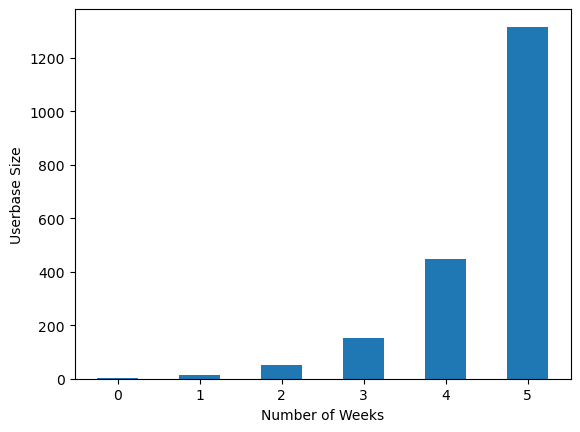

In [161]:
import matplotlib.pyplot as plt
import numpy as np



# Generate data for x and y axes
weeks = np.arange(0, 6)  # Range limited to 5 weeks
userbase_size = [population(n) for n in weeks]

# Create the bar plot
plt.bar(weeks, userbase_size, width=0.5, align='center')

# Set the axis labels
plt.xlabel('Number of Weeks')
plt.ylabel('Userbase Size')

# Set the y-axis to use a logarithmic scale
#plt.yscale('log')
plt.savefig('documents/userbase_plot.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

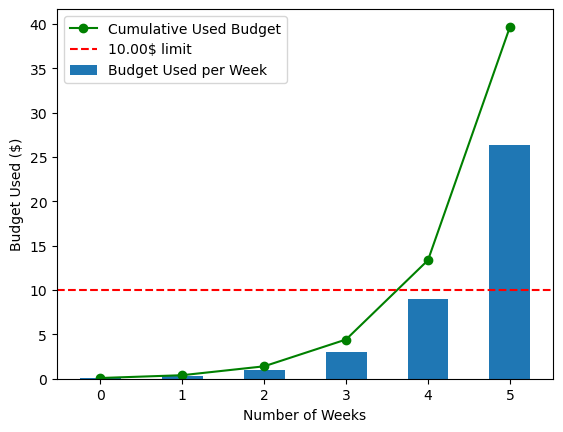

In [164]:
import matplotlib.pyplot as plt
import numpy as np


# Define the function for budget calculation
def budget(n):
    return tokens_to_money(weekly_token_usage*population(n))

# Generate data for x-axis
weeks = np.arange(0, 6)  # Range limited to 6 weeks


# Calculate budget used per week and cumulative total
budget_used_per_week = [budget(n) for n in weeks]
cumulative_budget = np.cumsum(budget_used_per_week)

# Create the plot
fig, ax = plt.subplots()

# Plot budget used per week
ax.bar(weeks, budget_used_per_week, width=0.5, align='center', label='Budget Used per Week')

# Plot cumulative total used budget
ax.plot(weeks, cumulative_budget, marker='o', color='green', label='Cumulative Used Budget')

# Add a red horizontal line at y=10.00
ax.axhline(y=10.00, color='red', linestyle='--', label='10.00$ limit')

# Set the axis labels
ax.set_xlabel('Number of Weeks')
ax.set_ylabel('Budget Used ($)')

# Set the y-axis to use a logarithmic scale
#ax.set_yscale('log')

# Add a legend
ax.legend()
plt.savefig('documents/budget_plot.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
